# Importing Libraries

In [7]:
import tqdm
import random
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Loading Price Data

In [10]:
companies = pd.read_excel("companies.xlsx") # IPOs
tickers = companies["Company Ticker"].tolist() # Loading company tickers
prices_dict = {}

for ticker in tqdm.tqdm(tickers):
    prices_df = yf.download(ticker, end="2025-01-31", interval="1wk", progress=False)[["Close", "High"]] # Downloading weekly prices

    prices_df.to_csv('prices.csv')
    prices_df = pd.read_csv("prices.csv", skiprows=3, names=["Date", "Close", "High"])

    prices_df['40 SMA'] = prices_df['Close'].rolling(window=40).mean().fillna(0) # Adding 200 DMA to the dataframe
    prices_dict[ticker] = prices_df.set_index("Date") # Seting index to datetime

100%|██████████| 141/141 [00:16<00:00,  8.45it/s]


# Trading Strategy

### Hidden for obvious reasons

# Metrics

,Metric,Value
0,Total Trades,116.000000
1,Average Profit %,76.024456
2,Average Loss %,-10.798136
3,Max Profit %,198.556697
4,Max Loss %,-29.356799
5,Trade Win %,37.931034
6,Risk-Reward Ratio,7.040517
7,Profit Factor,4.302538


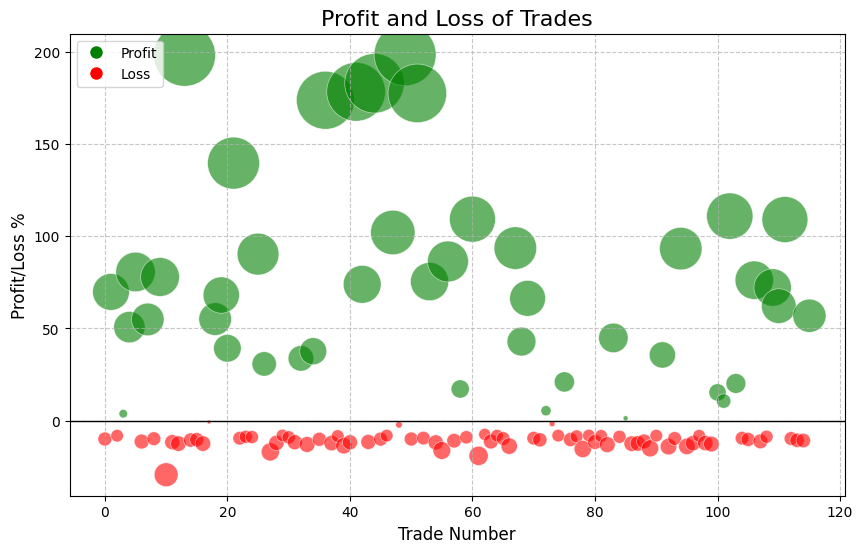

In [6]:
trades_random = random.sample(trades, int(np.round(len(trades), 0) * 1))

profits = [(exit_price - entry_price) / entry_price * 100 for _, entry_price, exit_price, _, _ in trades_random] # Storing profit percentage calculated from entry and exit
profits = [profit for profit in profits if profit < 400] # Removing profit percentage more than 400% (exceptional profits)

positive_profits = [p for p in profits if p > 0]
negative_profits = [p for p in profits if p < 0]

total_trades = len(profits) # Storing total number of trades
avg_profit = sum(positive_profits) / len(positive_profits) if positive_profits else 0 # Storing average profit percentages
avg_loss = sum(negative_profits) / len(negative_profits) if negative_profits else 0 # Storing average loss percentages
max_profit = max(positive_profits, default=0) # Storing max profit percentage
max_loss = min(negative_profits, default=0) # Storing max loss percentage
trade_win_percentage = (len(positive_profits) / len(profits)) * 100 if profits else 0 # Storing trade win perentage

risk_reward_ratio = (-avg_profit / avg_loss) if avg_loss != 0 else 0 # Storing risk-reward ratio
profit_factor = (avg_profit * trade_win_percentage / 100) / ((1 - trade_win_percentage / 100) * -avg_loss) if avg_loss != 0 and trade_win_percentage != 100 else 0 # Storing profit factor

metrics = {
        "Total Trades": total_trades,
        "Average Profit %": avg_profit,
        "Average Loss %": avg_loss,
        "Max Profit %": max_profit,
        "Max Loss %": max_loss,
        "Trade Win %": trade_win_percentage,
        "Risk-Reward Ratio": risk_reward_ratio,
        "Profit Factor": profit_factor,
    }

metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
display(metrics_df)

sizes = [abs(p) * 10 for p in profits] # Storing sizes according to magnitude of percentages
colors = ['green' if p > 0 else 'red' for p in profits] # Green color for profit and red color for losses

plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(len(profits)), profits, c=colors, s=sizes, alpha=0.6, edgecolors="w", linewidth=0.5)

plt.title('Profit and Loss of Trades', fontsize=16)
plt.xlabel('Trade Number', fontsize=12)
plt.ylabel('Profit/Loss %', fontsize=12)
plt.axhline(0, color='black',linewidth=1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Profit'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Loss')], loc='upper left')
plt.show()